# Hoja de trabajo 1

* Ale Gudiel
* Sofia Rueda

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sb
from scipy import stats

## Explorando los datos

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
df.shape

(1460, 81)

In [5]:
numerical = df.select_dtypes(include=['number'])
numerical.columns
numerical.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [6]:
categorical = df.select_dtypes(include=['object'])
categorical.columns
categorical.dtypes

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

## Análisis exploratorio

### Analizamos las variables numéricas

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


MSSubClass: 
 Kurtosis: 1.5706747728574895 
 Skewness: 1.4062101115313512 

LotFrontage: 
 Kurtosis: nan 
 Skewness: nan 

LotArea: 
 Kurtosis: 202.5437927513529 
 Skewness: 12.195142125084478 

OverallQual: 
 Kurtosis: 0.091856548449611 
 Skewness: 0.2167209765258641 

OverallCond: 
 Kurtosis: 1.0985212295913955 
 Skewness: 0.6923552135520978 

YearBuilt: 
 Kurtosis: -0.44215484565294716 
 Skewness: -0.612830724202899 

YearRemodAdd: 
 Kurtosis: -1.2719991404772555 
 Skewness: -0.5030444967597948 

MasVnrArea: 
 Kurtosis: nan 
 Skewness: nan 

BsmtFinSF1: 
 Kurtosis: 11.076089857631942 
 Skewness: 1.6837708962341815 

BsmtFinSF2: 
 Kurtosis: 20.04041549471293 
 Skewness: 4.250888017057445 

BsmtUnfSF: 
 Kurtosis: 0.4692620789683075 
 Skewness: 0.9193227015582005 

TotalBsmtSF: 
 Kurtosis: 13.201041630635025 
 Skewness: 1.522688086978629 

1stFlrSF: 
 Kurtosis: 5.722076026587489 
 Skewness: 1.3753417421837937 

2ndFlrSF: 
 Kurtosis: -0.5556767272864769 
 Skewness: 0.8121942731961613 



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


KitchenAbvGr: 
 Kurtosis: 21.45462663100792 
 Skewness: 4.483784093860484 

TotRmsAbvGrd: 
 Kurtosis: 0.8736413737415689 
 Skewness: 0.6756457673102017 

Fireplaces: 
 Kurtosis: -0.2206007337098992 
 Skewness: 0.6488976310170327 

GarageYrBlt: 
 Kurtosis: nan 
 Skewness: nan 

GarageCars: 
 Kurtosis: 0.2161348715110729 
 Skewness: -0.34219689543081294 

GarageArea: 
 Kurtosis: 0.9098227950882034 
 Skewness: 0.1797959420587727 

WoodDeckSF: 
 Kurtosis: 2.978604140391349 
 Skewness: 1.5397916998042025 

OpenPorchSF: 
 Kurtosis: 8.457180405184337 
 Skewness: 2.361911928568972 

EnclosedPorch: 
 Kurtosis: 10.39097160371135 
 Skewness: 3.086696471376678 

3SsnPorch: 
 Kurtosis: 123.23517727268867 
 Skewness: 10.293752357165413 

ScreenPorch: 
 Kurtosis: 18.371874098863685 
 Skewness: 4.1179773827954875 

PoolArea: 
 Kurtosis: 222.500506832132 
 Skewness: 14.813134660429398 

MiscVal: 
 Kurtosis: 698.6008400387273 
 Skewness: 24.4516396173223 

MoSold: 
 Kurtosis: -0.40683350802995655 
 Skew

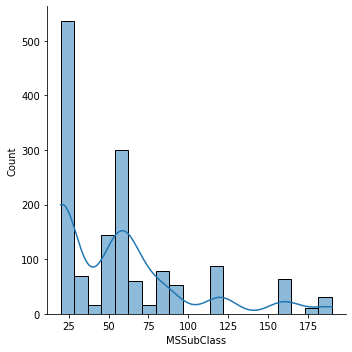

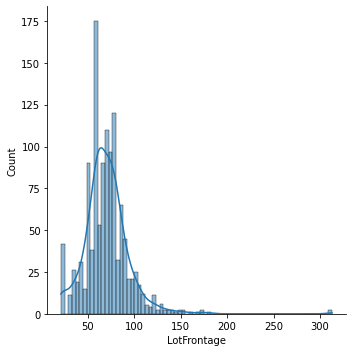

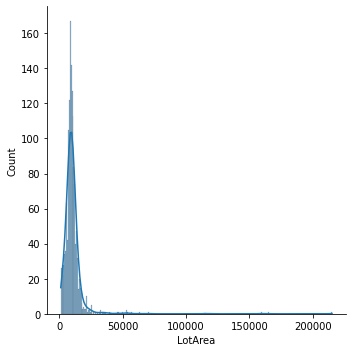

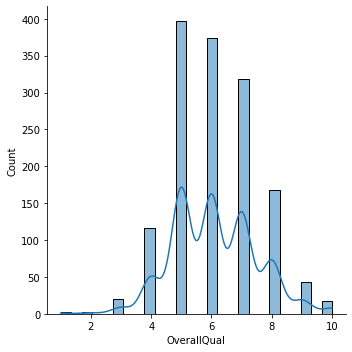

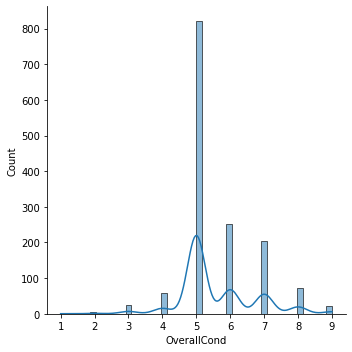

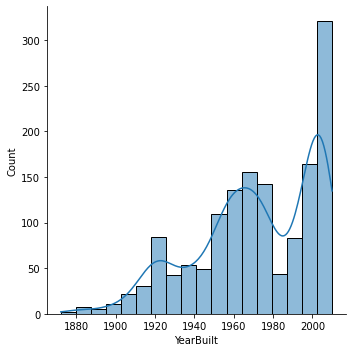

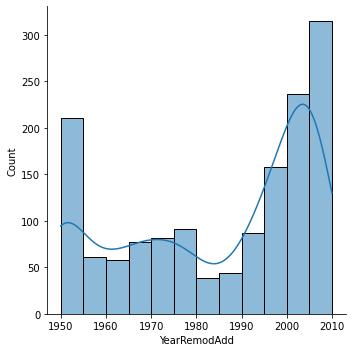

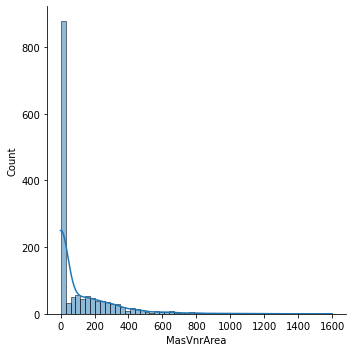

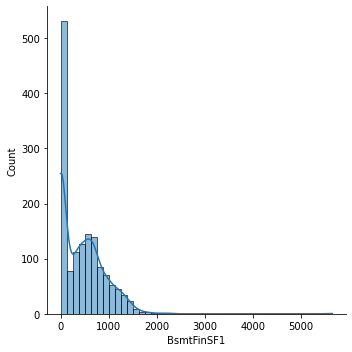

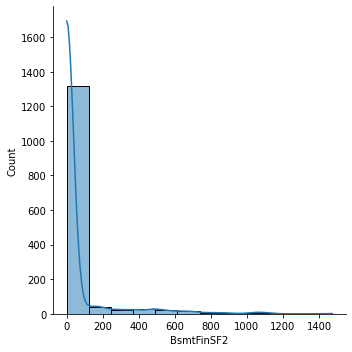

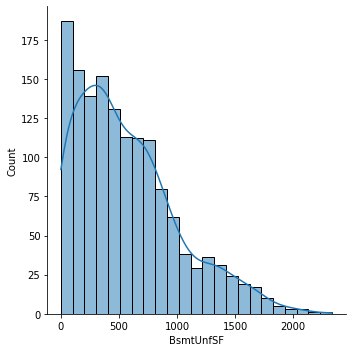

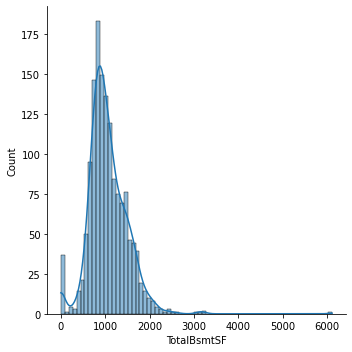

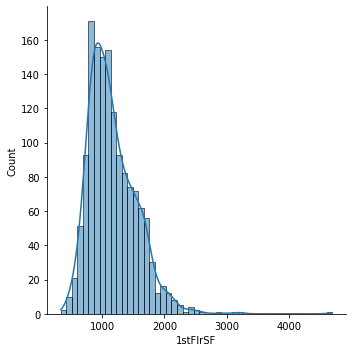

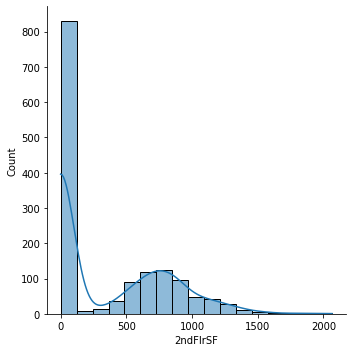

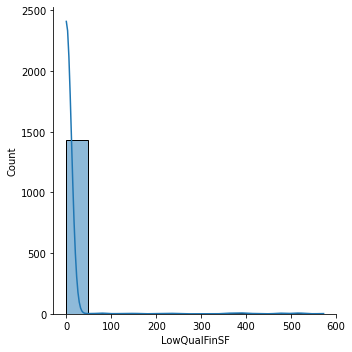

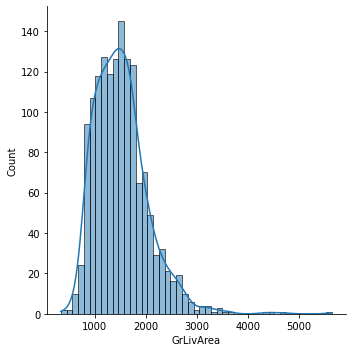

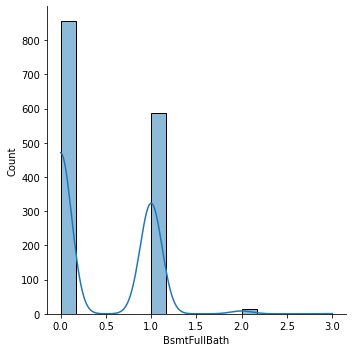

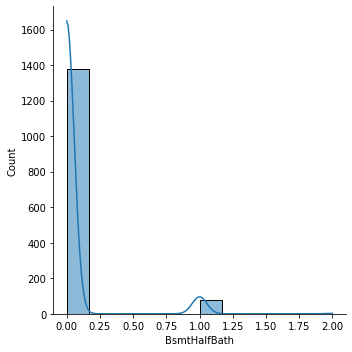

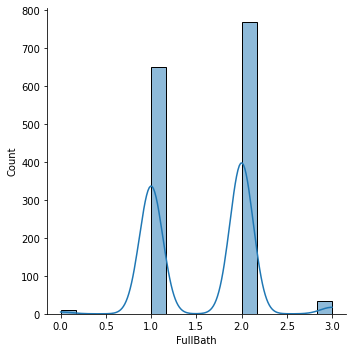

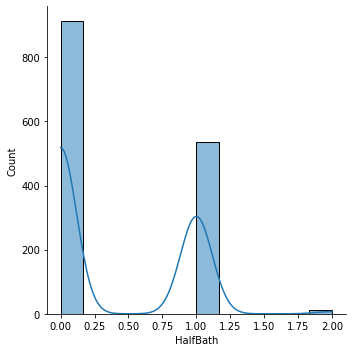

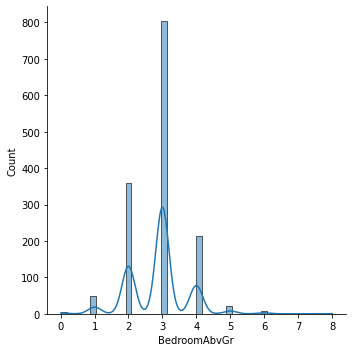

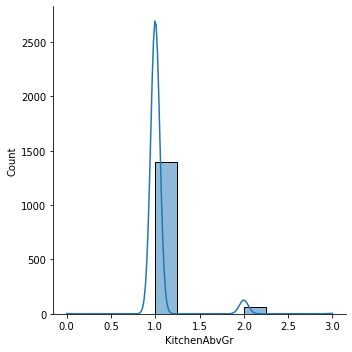

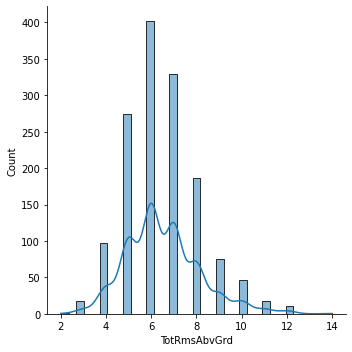

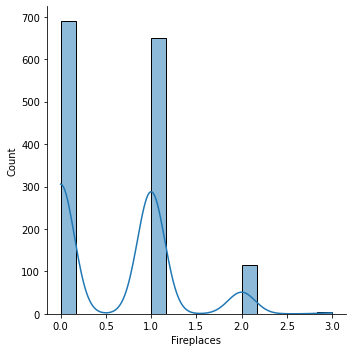

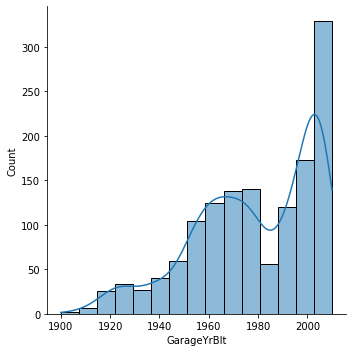

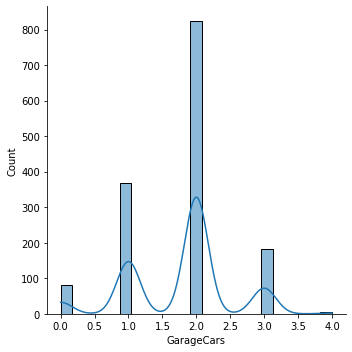

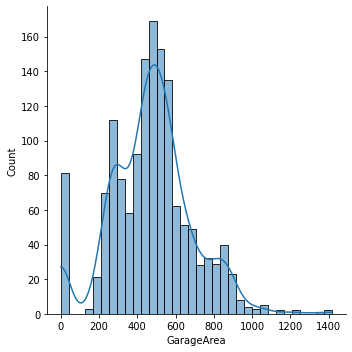

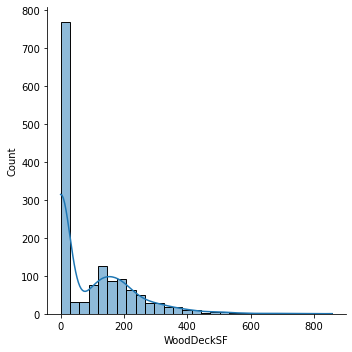

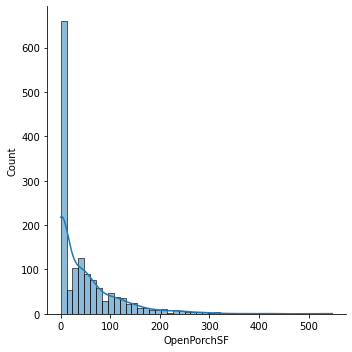

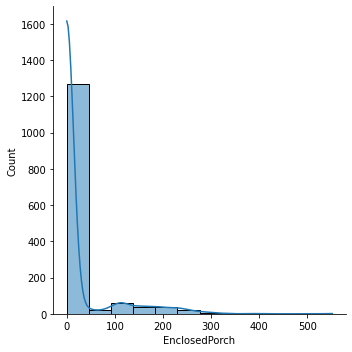

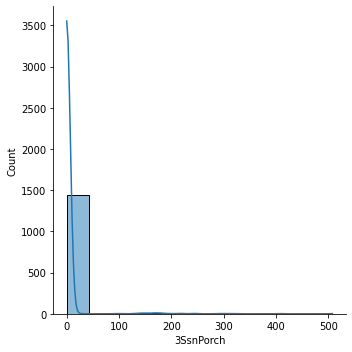

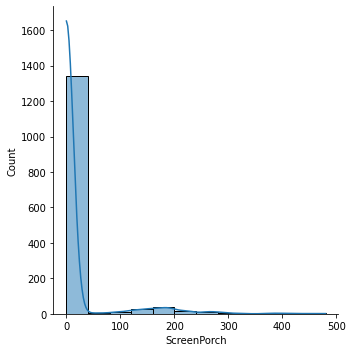

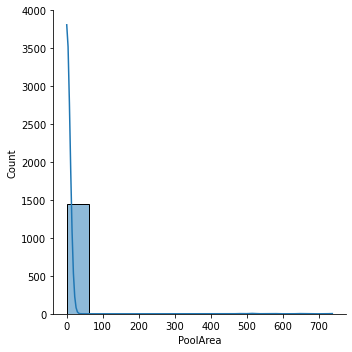

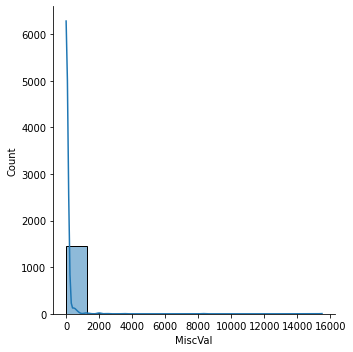

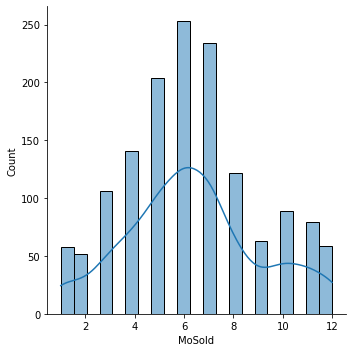

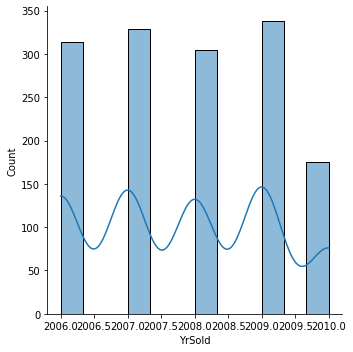

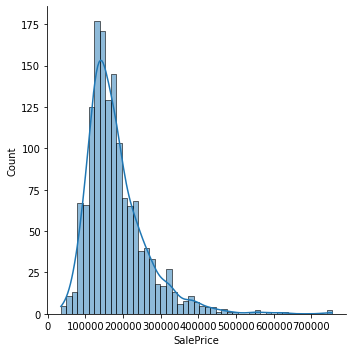

In [8]:
cuanti = ['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF' ,'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice']
for cuan in cuanti:
    sb.displot(df[cuan], kde=True)
    print('\033[1m' + cuan + '\033[0m' + ': \n Kurtosis:', stats.kurtosis(df[cuan]), '\n Skewness:', stats.skew(df[cuan]), '\n')

<AxesSubplot:>

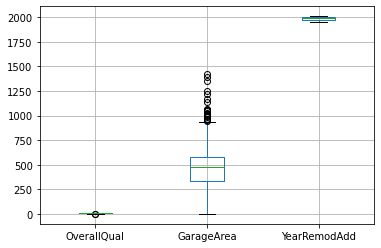

In [9]:
df.boxplot(column=["OverallQual", "GarageArea", "YearRemodAdd"])

### Analizamos las variables cualitativas

In [10]:
df.describe(include=['object']).transpose()
cuali = ['MSZoning', 'Street','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']

MSZoning


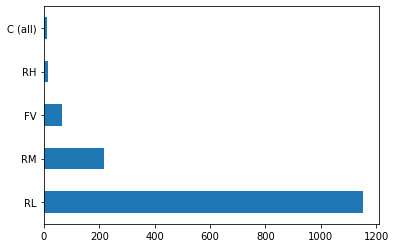

<Figure size 1440x360 with 0 Axes>

Street


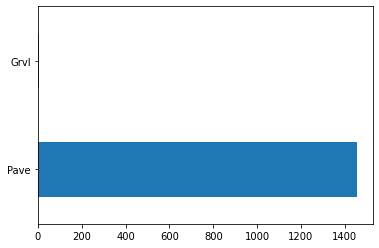

<Figure size 1440x360 with 0 Axes>

BsmtExposure


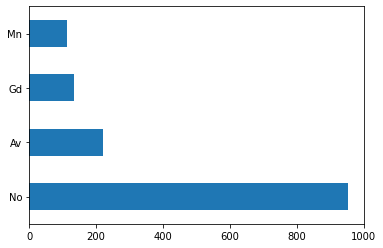

<Figure size 1440x360 with 0 Axes>

BsmtFinType1


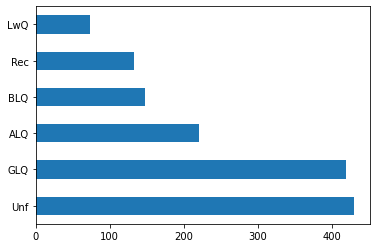

<Figure size 1440x360 with 0 Axes>

BsmtFinType2


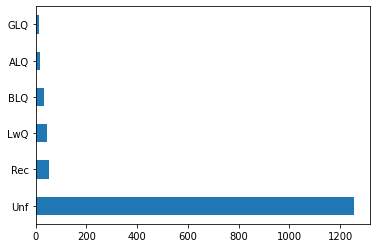

<Figure size 1440x360 with 0 Axes>

Heating


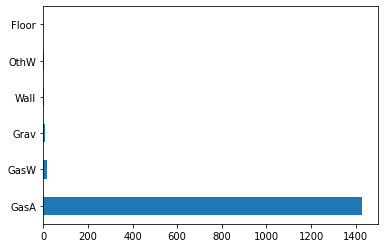

<Figure size 1440x360 with 0 Axes>

HeatingQC


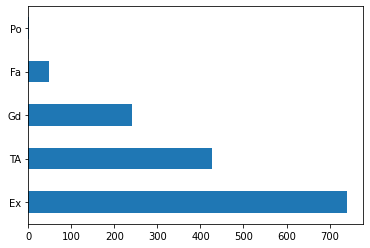

<Figure size 1440x360 with 0 Axes>

CentralAir


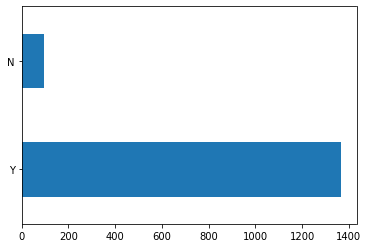

<Figure size 1440x360 with 0 Axes>

Electrical


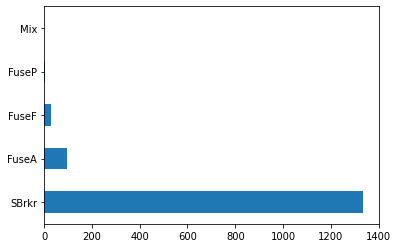

<Figure size 1440x360 with 0 Axes>

KitchenQual


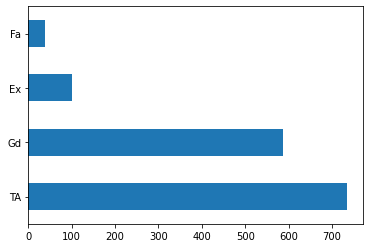

<Figure size 1440x360 with 0 Axes>

Functional


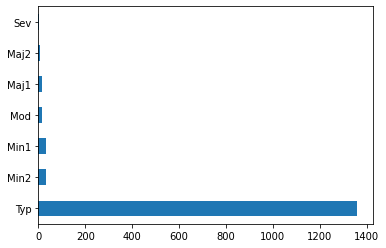

<Figure size 1440x360 with 0 Axes>

FireplaceQu


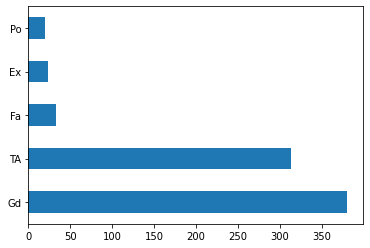

<Figure size 1440x360 with 0 Axes>

GarageType


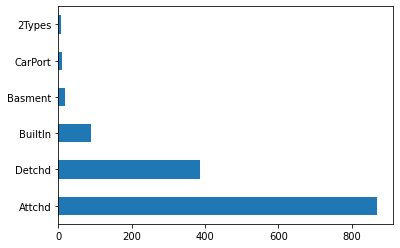

<Figure size 1440x360 with 0 Axes>

GarageFinish


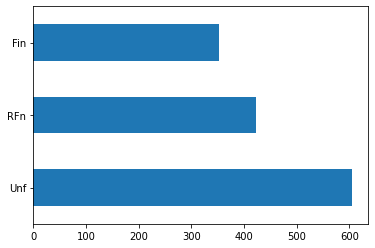

<Figure size 1440x360 with 0 Axes>

GarageQual


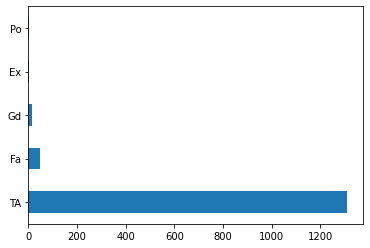

<Figure size 1440x360 with 0 Axes>

GarageCond


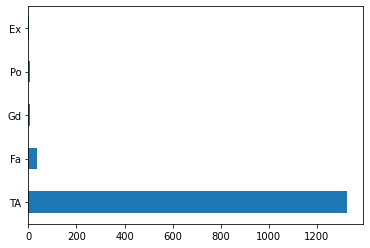

<Figure size 1440x360 with 0 Axes>

PavedDrive


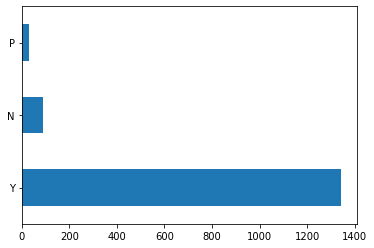

<Figure size 1440x360 with 0 Axes>

PoolQC


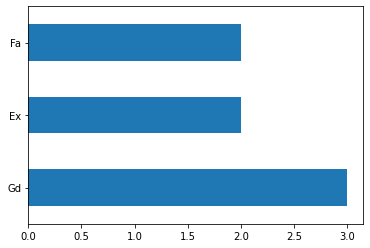

<Figure size 1440x360 with 0 Axes>

Fence


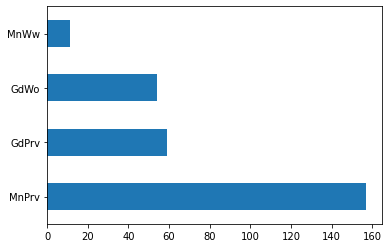

<Figure size 1440x360 with 0 Axes>

MiscFeature


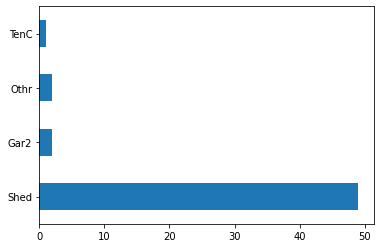

<Figure size 1440x360 with 0 Axes>

SaleType


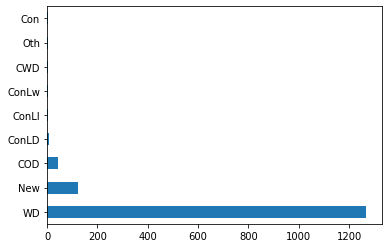

<Figure size 1440x360 with 0 Axes>

SaleCondition


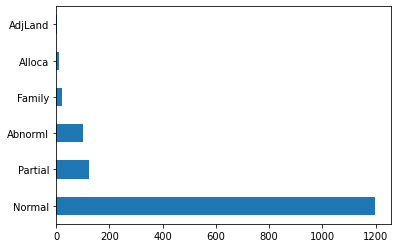

<Figure size 1440x360 with 0 Axes>

In [11]:
pd.set_option("display.max_rows", df.shape[0]+1)
for cual in cuali:
  #Omitimos ID ya que no tiene información relevante
  if(cual == "Id"):
    pass
  #Hacemos una tabla de frecuencias para poder apreciar la información
  elif(cual in ["Neighborhood", "YearBuilt", "YearRemodAdd", "GarageYrBlt"]):
    print(df[cual].value_counts(), "\n")
  else:
    df[cual].value_counts().plot(kind='barh')
    plt.figure(figsize=(20,5))
    print(cual)
    plt.show()

### Analizamos el valor de correlación en las variables cuantitativas

Text(0.5, 1.0, 'Correlacion entre variables categóricas')

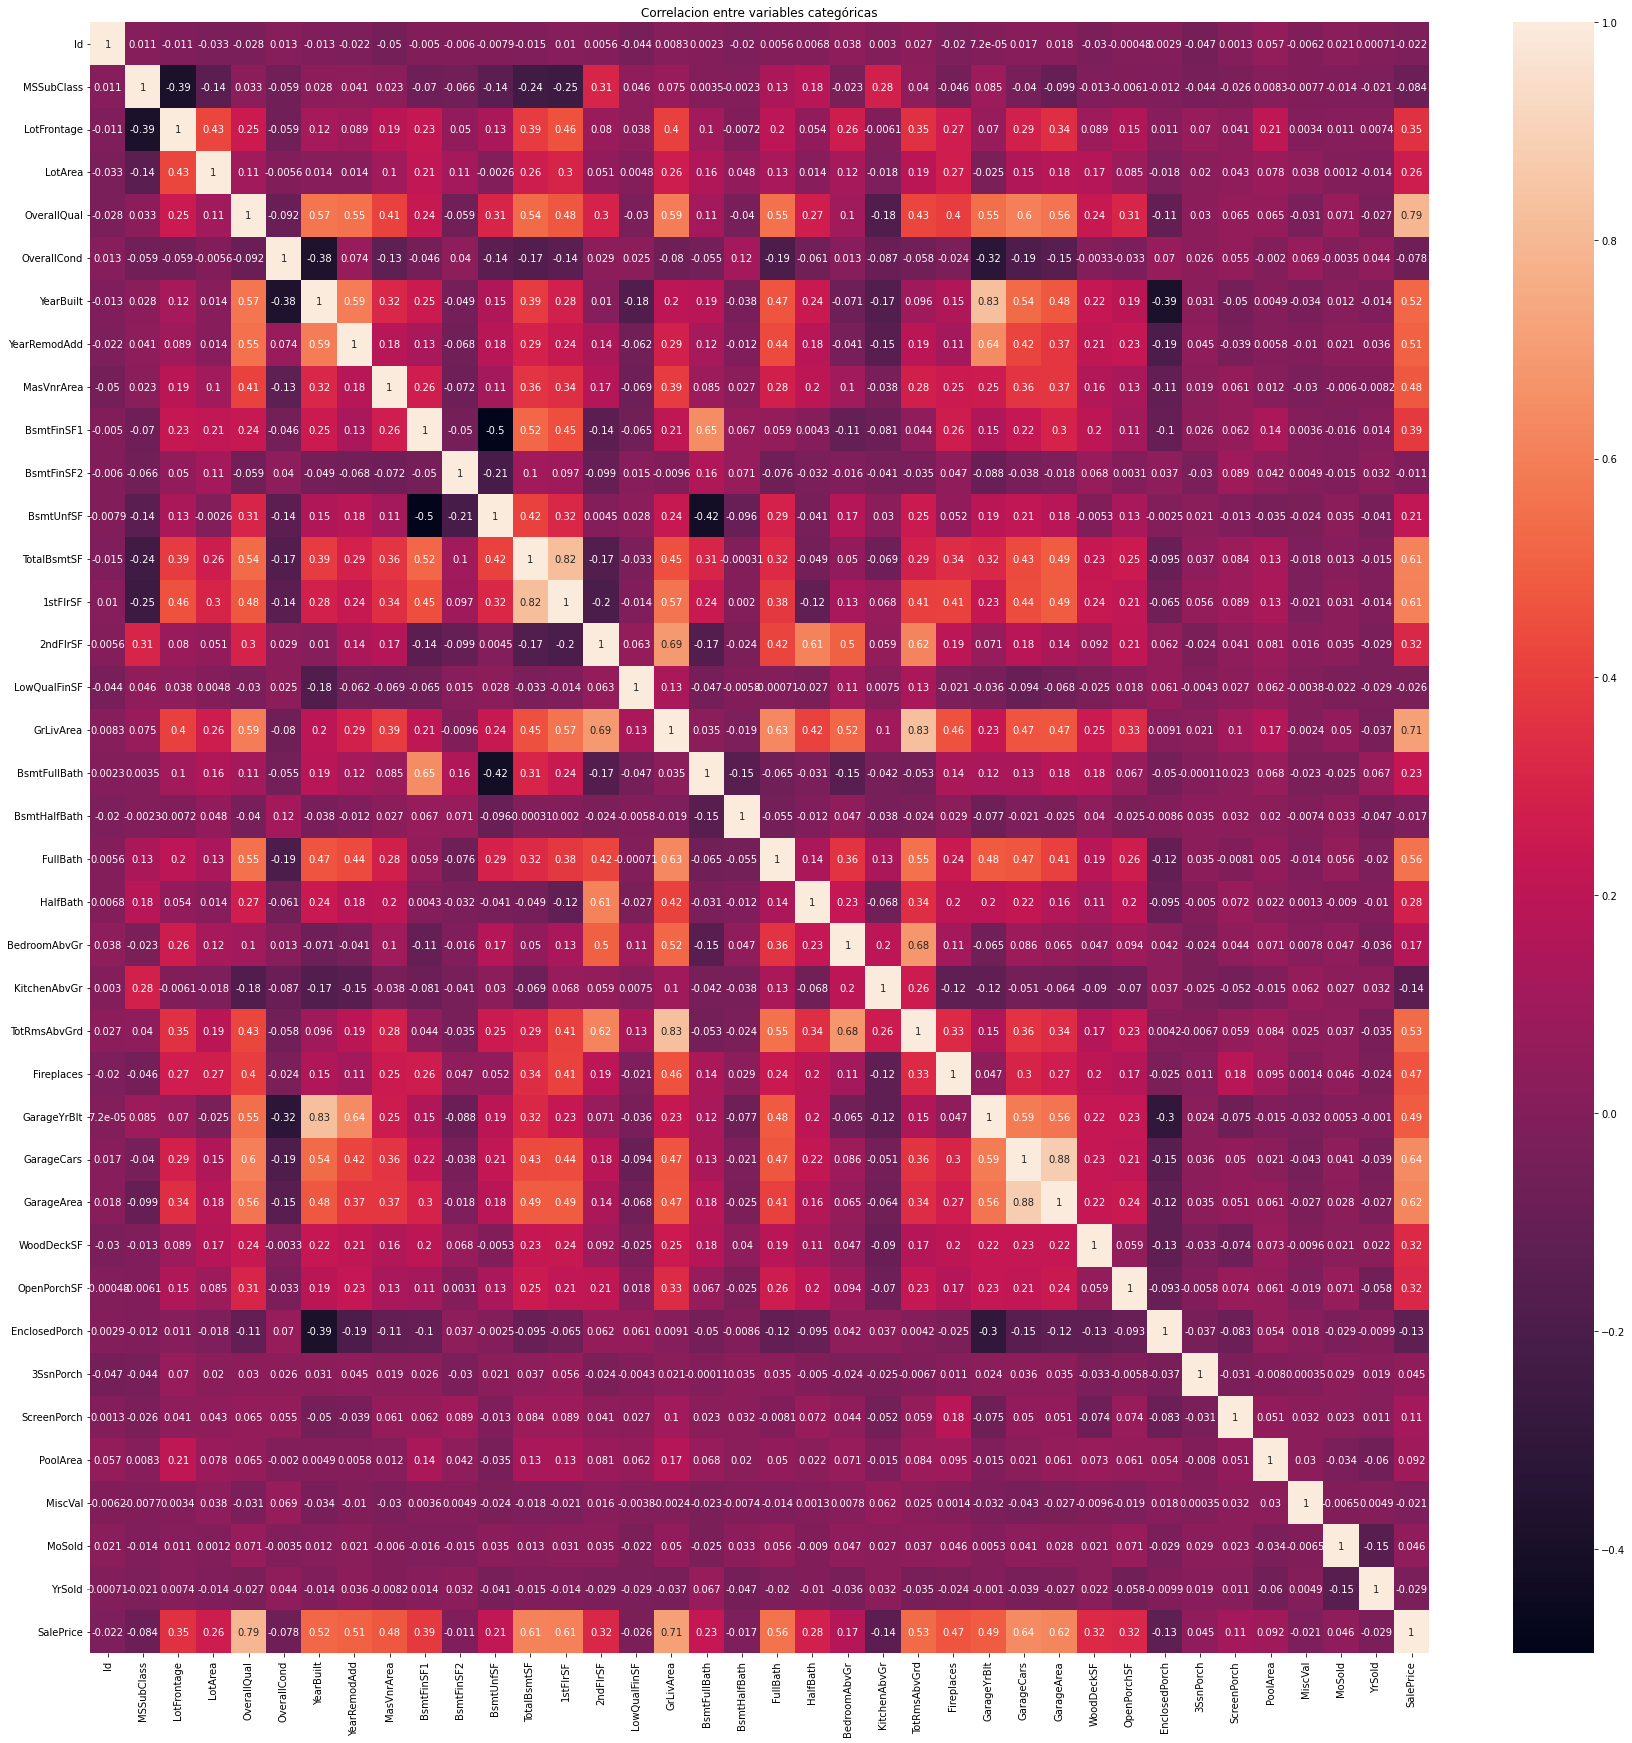

In [12]:
df_corr = df.corr()
f, ax = plt.subplots(figsize=(30,30))
sb.heatmap(df_corr, xticklabels=df_corr.columns, yticklabels=df_corr.columns, annot=True, ax=ax,annot_kws={'size': 10})
plt.title("Correlacion entre variables categóricas")

### Realizamos una matriz de correlación para "SalesPrice"

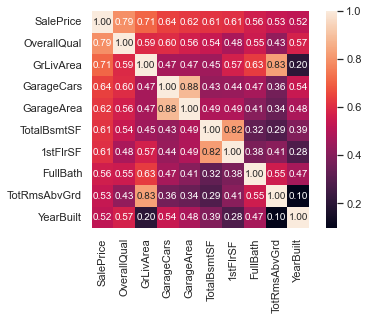

In [13]:
k = 10
corrmat = df.corr()
columns = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[columns].values.T)
sb.set(font_scale=1)
sb.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

### Obtenemos la relación entre las variables más significativas

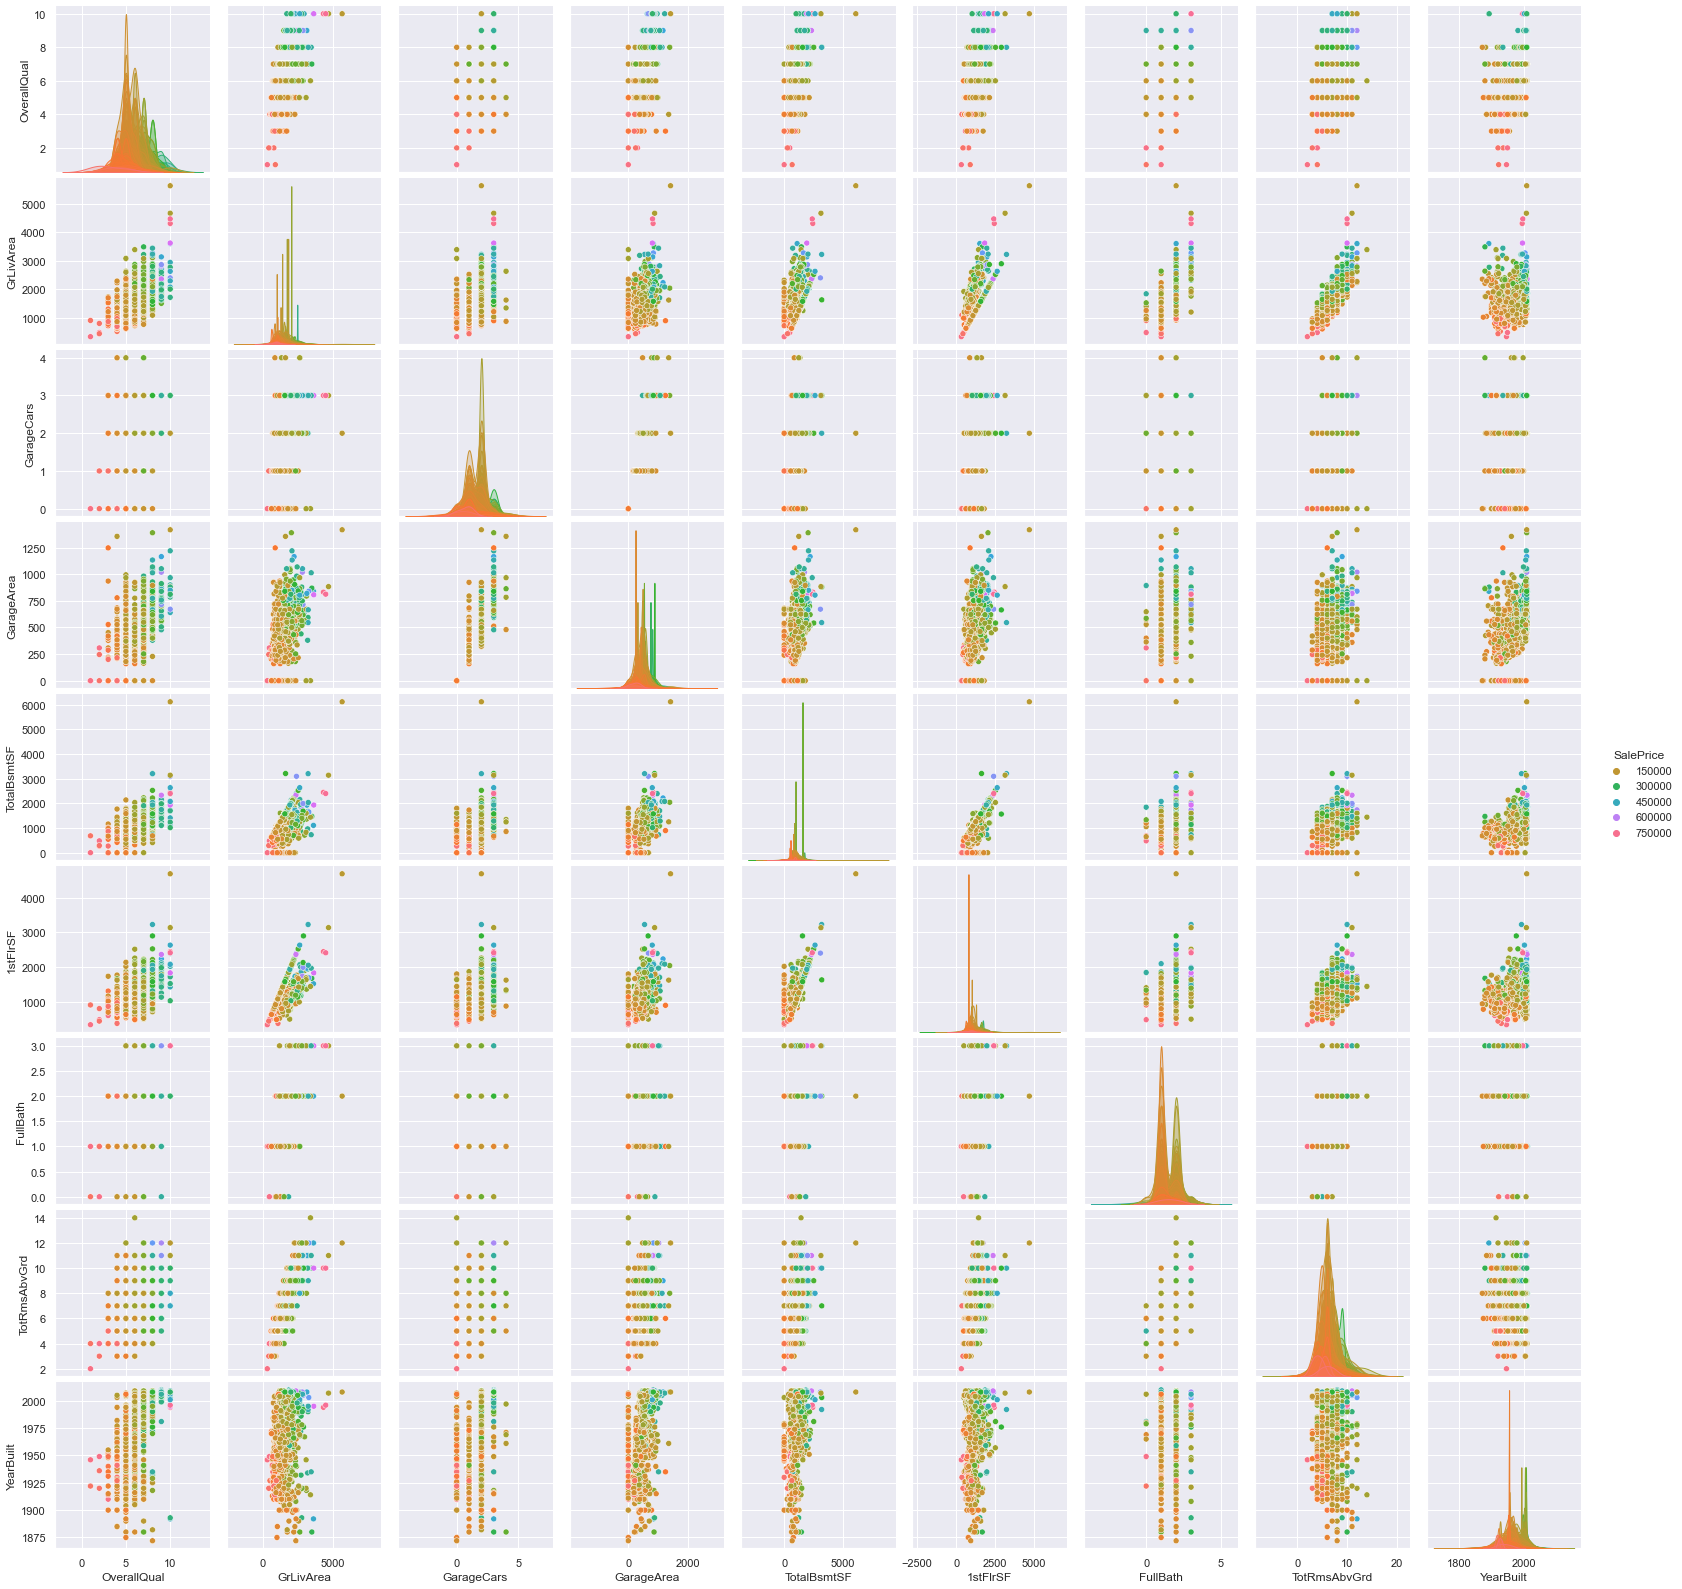

In [14]:
sb.pairplot(df[columns], hue='SalePrice', palette='husl')
plt.show()

## Análisis de componentes principales

- Estudia la matriz de correlación, la agrega y explica lo que observa en ella
- Determina si es posible usar la técnica de análisis factorial para hallar las componentes
principales
- Determina si vale la pena aplicar las componentes principales interpretando el test de
esfericidad de Bartlett
- Obtiene los componentes principales y explica cuántos seleccionará para explicar la mayor
variabilidad posible.
- Interpreta los coeficientes principales.

## Reglas de asociación
- Construye reglas de asociación usando el algoritmo a priori.
- Discute sobre las reglas de asociación más interesantes teniendo en cuenta sus niveles de
confianza y soporte.

## Hallazgos y conclusiones.
- Hace un resumen de los hallazgos en el análisis exploratorio
- Llega a conclusiones sobre el análisis de componentes principales
- Determina las reglas de asociación más interesantes.